In [3]:
!git clone https://github.com/crowdai/crowdai-mapping-challenge-mask-rcnn


Cloning into 'crowdai-mapping-challenge-mask-rcnn'...
remote: Counting objects: 579, done.
remote: Total 579 (delta 0), reused 0 (delta 0), pack-reused 579
Receiving objects: 100% (579/579), 82.36 MiB | 23.16 MiB/s, done.
Resolving deltas: 100% (319/319), done.


In [0]:
import os
os.chdir('../')

In [5]:
!git clone https://github.com/waleedka/coco


Cloning into 'coco'...
remote: Counting objects: 904, done.
remote: Total 904 (delta 0), reused 0 (delta 0), pack-reused 904
Receiving objects: 100% (904/904), 10.39 MiB | 12.25 MiB/s, done.
Resolving deltas: 100% (541/541), done.


In [24]:
!ls

coco  crowdai-mapping-challenge-mask-rcnn  datalab  Mask_RCNN


In [25]:
!pip install -U setuptools
!pip install -U wheel
!make install -C coco/PythonAPI

  Using cached https://files.pythonhosted.org/packages/ff/f4/385715ccc461885f3cedf57a41ae3c12b5fec3f35cce4c8706b1a112a133/setuptools-40.0.0-py2.py3-none-any.whl
tensorflow 1.9.0 has requirement setuptools<=39.1.0, but you'll have setuptools 40.0.0 which is incompatible.
  Found existing installation: setuptools 39.1.0
    Uninstalling setuptools-39.1.0:
      Successfully uninstalled setuptools-39.1.0
Requirement already up-to-date: wheel in /usr/local/lib/python3.6/dist-packages (0.31.1)
make: Entering directory '/content/coco/PythonAPI'
# install pycocotools to the Python site-packages
python setup.py build_ext install
Compiling pycocotools/_mask.pyx because it changed.
[1/1] Cythonizing pycocotools/_mask.pyx
running build_ext
building 'pycocotools._mask' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/pycocotools
creating build/common
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -Wstrict-prototypes -g -fdebug-prefix-m

In [0]:
import os
os.chdir('crowdai-mapping-challenge-mask-rcnn')

In [28]:
!ls data

_  pretrained_weights.h5


In [10]:
!pip3 install -r requirements.txt


    100% |████████████████████████████████| 3.4MB 10.7MB/s 
    100% |████████████████████████████████| 634kB 25.8MB/s 
    100% |████████████████████████████████| 61kB 17.9MB/s 
    100% |████████████████████████████████| 573kB 19.3MB/s 
    100% |████████████████████████████████| 1.9MB 10.2MB/s 
    100% |████████████████████████████████| 112kB 24.9MB/s 


    100% |████████████████████████████████| 204kB 22.9MB/s 
    100% |████████████████████████████████| 163kB 19.4MB/s 
    100% |████████████████████████████████| 112kB 25.3MB/s 
    100% |████████████████████████████████| 552kB 22.0MB/s 
    100% |████████████████████████████████| 8.1MB 5.4MB/s 
    100% |████████████████████████████████| 71kB 23.8MB/s 
    100% |████████████████████████████████| 2.2MB 14.4MB/s 


  Running setup.py bdist_wheel for imgaug ... - \ | done
  Stored in directory: /content/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: setuptools 40.0.0
    Uninstalling setuptools-40.0.0:
      Successfully uninstalled setuptools-40.0.0


In [11]:
!python3 setup.py install


running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mrcnn
copying mrcnn/dataset.py -> build/lib/mrcnn
copying mrcnn/cocoeval.py -> build/lib/mrcnn
copying mrcnn/visualize.py -> build/lib/mrcnn
copying mrcnn/config.py -> build/lib/mrcnn
copying mrcnn/model.py -> build/lib/mrcnn
copying mrcnn/utils.py -> build/lib/mrcnn
copying mrcnn/__init__.py -> build/lib/mrcnn
copying mrcnn/parallel_model.py -> build/lib/mrcnn
copying mrcnn/evaluate.py -> build/lib/mrc

In [31]:
!ls data

_  pretrained_weights.h5


In [35]:
!ls data/test/



images


In [0]:
!mv ../Mask_RCNN/drive/'Colab Notebooks'/images/test_images/* data/test/images




In [37]:
import os
import sys
import time
import numpy as np
import skimage.io

from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from pycocotools import mask as maskUtils

import coco #a slightly modified version

from mrcnn.evaluate import build_coco_results, evaluate_coco
from mrcnn.dataset import MappingChallengeDataset
from mrcnn import visualize


import zipfile
import urllib.request
import shutil
import glob
import tqdm
import random

Using TensorFlow backend.


In [0]:
ROOT_DIR = os.getcwd()

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import model as modellib, utils


PRETRAINED_MODEL_PATH = os.path.join(ROOT_DIR,"data/" "pretrained_weights.h5")
LOGS_DIRECTORY = os.path.join(ROOT_DIR, "logs")
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
IMAGE_DIR = os.path.join(ROOT_DIR, "data", "test", "images")

In [39]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 5
    NUM_CLASSES = 1 + 1  # 1 Background + 1 Building
    IMAGE_MAX_DIM=320
    IMAGE_MIN_DIM=320
    NAME = "crowdai-mapping-challenge"
config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     5
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 5
IMAGE_MAX_DIM                  320
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  320
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [320 320   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [123.7 116.8 103.9]
MINI_MASK_SHAPE                (56, 56)
NAME                           crowdai-mapping-challenge
NUM_CLASSES                    2
POOL_SIZE                      7
POST_NMS_ROIS_INFERENC

In [0]:
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

model_path = PRETRAINED_MODEL_PATH

# or if you want to use the latest trained model, you can use : 
# model_path = model.find_last()[1]

model.load_weights(model_path, by_name=True)

In [0]:
class_names = ['BG', 'building'] # In our case, we have 1 class for the background, and 1 class for building

Processing 5 images
image                    shape: (300, 300, 3)         min:    0.00000  max:  255.00000  uint8
image                    shape: (300, 300, 3)         min:    0.00000  max:  255.00000  uint8
image                    shape: (300, 300, 3)         min:    0.00000  max:  255.00000  uint8
image                    shape: (300, 300, 3)         min:    0.00000  max:  255.00000  uint8
image                    shape: (300, 300, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (5, 320, 320, 3)      min: -113.70000  max:  151.10000  float64
image_metas              shape: (5, 14)               min:    0.00000  max:  320.00000  float64
anchors                  shape: (5, 25575, 4)         min:   -1.13492  max:    1.93429  float32


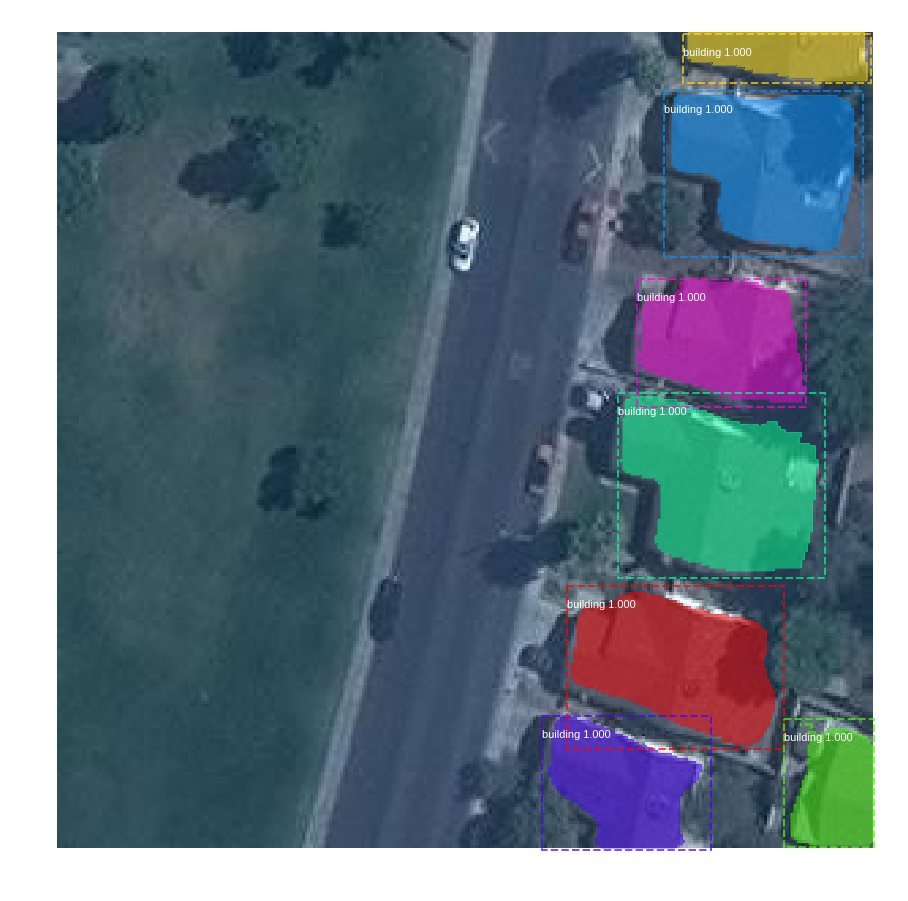

In [48]:
file_names = next(os.walk(IMAGE_DIR))[2]
random_image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

predictions = model.detect([random_image]*config.BATCH_SIZE, verbose=1) # We are replicating the same image to fill up the batch_size

p = predictions[0]
visualize.display_instances(random_image, p['rois'], p['masks'], p['class_ids'], 
                            class_names, p['scores'])